In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pickle

from cnnwastedetector.utils import visualize_batch
from cnnwastedetector import BaseModel, ModelRegularized

In [2]:
device = (
    'cuda'
    if torch.cuda.is_available()
    else 'mps'
    if torch.backends.mps.is_available()
    else 'cpu'
)
print(f'Using {device} device')

Using cuda device


In [9]:
model_ = BaseModel()

In [10]:
loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_.model.parameters(), lr=0.001, weight_decay=1e-4)

In [11]:
trainer = model_.as_trainer(loss, optimizer)
trainer(10)

Epoch [1/10], Loss: 1.2895762692479527
Validation Loss: 1.0929230861365795, Accuracy: 54.296875%
Epoch [2/10], Loss: 0.9072702772477094
Validation Loss: 0.9172375164926052, Accuracy: 65.4296875%
Epoch [3/10], Loss: 0.8590706358937656
Validation Loss: 0.8198801651597023, Accuracy: 69.53125%
Epoch [4/10], Loss: 0.7144489007837632
Validation Loss: 0.8723961357027292, Accuracy: 66.796875%
Epoch [5/10], Loss: 0.6633415528956581
Validation Loss: 0.7230763155966997, Accuracy: 73.828125%
Epoch [6/10], Loss: 0.6351912047933129
Validation Loss: 0.7768570221960545, Accuracy: 71.6796875%
Epoch [7/10], Loss: 0.5739647930159288
Validation Loss: 0.7388814818114042, Accuracy: 73.4375%
Epoch [8/10], Loss: 0.587302937227137
Validation Loss: 0.7304007150232792, Accuracy: 73.828125%
Epoch [9/10], Loss: 0.4837803972118041
Validation Loss: 0.7224671598523855, Accuracy: 72.8515625%
Epoch [10/10], Loss: 0.4160558287711704
Validation Loss: 0.7740742489695549, Accuracy: 75.78125%
Finished Training


In [12]:
batch = next(iter(trainer.test_loader))
X = batch[0].to(device)
pred_probab = model_(X)
y_pred = pred_probab.argmax(1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.06541863..1.0293211].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.10779708..1.0259275].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.087318756..1.0243021].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.020635007..1.0259275].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.020635007..1.0293211].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.020635007..1.0293211].


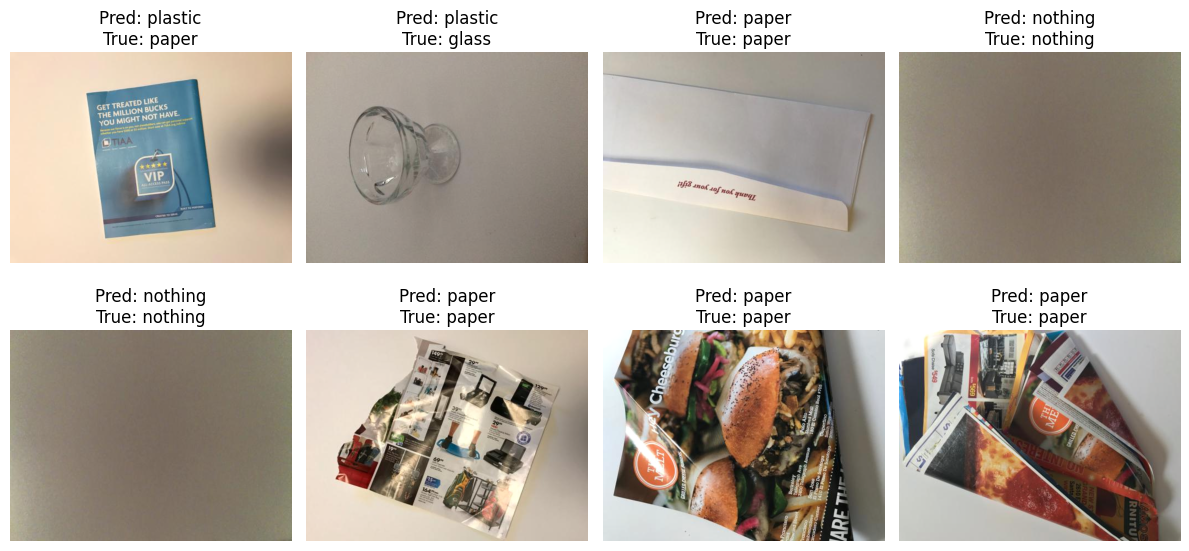

In [14]:
visualize_batch(batch, y_pred)

In [15]:
model_path = '../pickle/base_model.pkl'

with open(model_path, 'wb') as file:
    pickle.dump(trainer.get_model().state_dict(), file)

print(f'Model saved to {model_path}')


Model saved to ../pickle/base_model.pkl


In [3]:
model_regularized = ModelRegularized()

In [4]:
loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(
    model_regularized.model.parameters(), lr=0.001, weight_decay=1e-4
)

In [5]:
trainer_regularized = model_regularized.as_trainer(loss, optimizer)
trainer_regularized(10)

Epoch [1/10], Loss: 1.6174610888256746
Validation Loss: 1.4039190784096718, Accuracy: 39.6484375%
Epoch [2/10], Loss: 1.2163053715930265
Validation Loss: 1.1626857779920101, Accuracy: 51.5625%
Epoch [3/10], Loss: 1.0620298718704897
Validation Loss: 0.9793979525566101, Accuracy: 61.71875%
Epoch [4/10], Loss: 0.9587355010649737
Validation Loss: 0.9358248449862003, Accuracy: 63.0859375%
Epoch [5/10], Loss: 0.883190253201653
Validation Loss: 0.8359893523156643, Accuracy: 67.578125%
Epoch [6/10], Loss: 0.8230798840522766
Validation Loss: 0.8322771117091179, Accuracy: 67.578125%
Epoch [7/10], Loss: 0.7946862034937915
Validation Loss: 0.8453105706721544, Accuracy: 69.7265625%
Epoch [8/10], Loss: 0.7738702192026026
Validation Loss: 0.7758937515318394, Accuracy: 67.96875%
Epoch [9/10], Loss: 0.7196681201457977
Validation Loss: 0.8884047716856003, Accuracy: 67.3828125%
Epoch [10/10], Loss: 0.7030089243369944
Validation Loss: 0.8030742686241865, Accuracy: 69.53125%
Finished Training


In [6]:
batch = next(iter(trainer_regularized.test_loader))
X = batch[0].to(device)
pred_probab = model_regularized(X)
y_pred = pred_probab.argmax(1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.015072772..1.0243021].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.020635007..1.0293211].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.015072772..1.0259275].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.017212028..1.0293211].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.020635007..1.0293211].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.020635007..1.0293211].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got rang

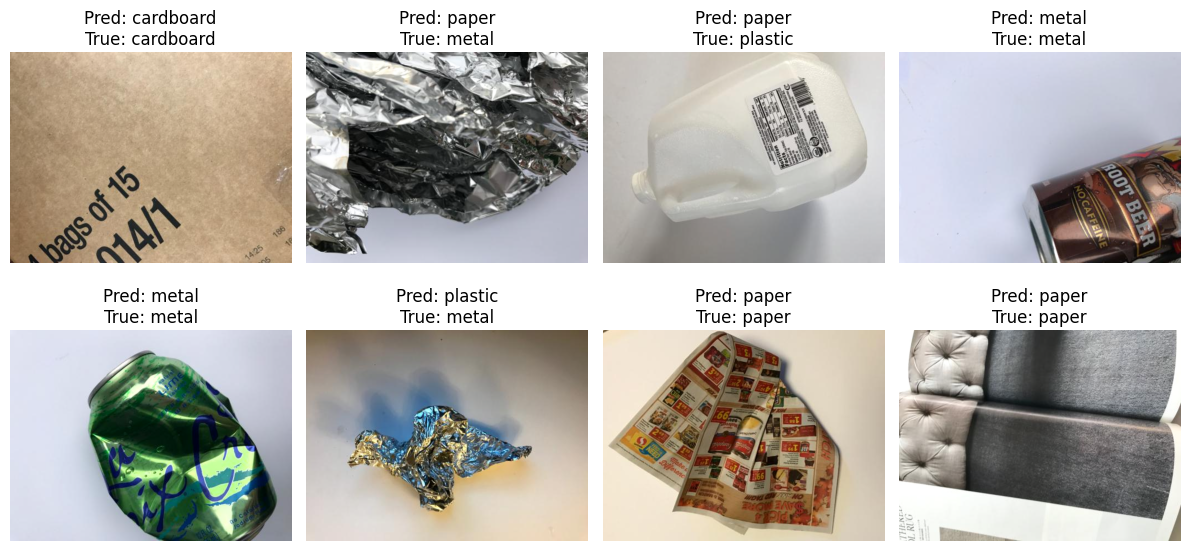

In [7]:
visualize_batch(batch, y_pred)

In [8]:
model_path = '../pickle/model_regularized.pkl'

with open(model_path, 'wb') as file:
    pickle.dump(trainer_regularized.get_model().state_dict(), file)

print(f'Model saved to {model_path}')


Model saved to ../pickle/model_regularized.pkl
